# Introduction into Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([1,2,3,4,5])
print(s, s.index, s.values)

0    1
1    2
2    3
3    4
4    5
dtype: int64 RangeIndex(start=0, stop=5, step=1) [1 2 3 4 5]


In [3]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
fruits2 = ['raspberries', 'oranges', 'cherries', 'pears']

quantities = [20,33,52,10]
s = pd.Series(quantities, index=fruits)
s2 = pd.Series([10,10,10,10], index=fruits)
s3 = pd.Series([1,1,1,1], index=fruits2)
s + s2 + s3

apples          NaN
cherries       63.0
oranges        44.0
pears          21.0
raspberries     NaN
dtype: float64

In [4]:
s = pd.Series([20,33,52,10], index=['apples', 'oranges', 'cherries', 'pears'] )
print(s['apples'])
print(s[['apples', 'pears']])

20
apples    20
pears     10
dtype: int64


In [5]:
print( s.apply(np.log), "\n" )
print( s.apply( lambda x: x if x>50 else x+10 ) )

apples      2.995732
oranges     3.496508
cherries    3.951244
pears       2.302585
dtype: float64 

apples      30
oranges     43
cherries    52
pears       20
dtype: int64


In [6]:
print( s[s>30], "\n" )
print( "apples" in s )

oranges     33
cherries    52
dtype: int64 

True


In [7]:
cities = {"London":    8615246, 
          "Berlin":    3562166, 
          "Madrid":    3165235, 
          "Rome":      2874038, 
          "Paris":     2273305, 
          "Vienna":    1805681, 
          "Bucharest": 1803425, 
          "Hamburg":   1760433,
          "Budapest":  1754000,
          "Warsaw":    1740119,
          "Barcelona": 1602386,
          "Munich":    1493900,
          "Milan":     1350680}

city_series = pd.Series(cities)
city_series

London       8615246
Berlin       3562166
Madrid       3165235
Rome         2874038
Paris        2273305
Vienna       1805681
Bucharest    1803425
Hamburg      1760433
Budapest     1754000
Warsaw       1740119
Barcelona    1602386
Munich       1493900
Milan        1350680
dtype: int64

In [8]:
my_cities = ["London", "Paris", "Zurich", "Berlin", "Stuttgart", "Hamburg"]
my_cities_series = pd.Series(cities, index=my_cities)
print( my_cities_series, "\n" )
print(my_cities_series.isnull(), "\n")
print(my_cities_series.notnull())

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64 

London       False
Paris        False
Zurich        True
Berlin       False
Stuttgart     True
Hamburg      False
dtype: bool 

London        True
Paris         True
Zurich       False
Berlin        True
Stuttgart    False
Hamburg       True
dtype: bool


In [9]:
d = {"a":23, "b":45, "c":None, "d":0}
s = pd.Series(d)
s

a    23.0
b    45.0
c     NaN
d     0.0
dtype: float64

In [10]:
print( my_cities_series.dropna() )

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64


In [11]:
print( my_cities_series.fillna(0) )

London       8615246.0
Paris        2273305.0
Zurich             0.0
Berlin       3562166.0
Stuttgart          0.0
Hamburg      1760433.0
dtype: float64


In [12]:
missing_cities = {"Stuttgart":597939, "Zurich":378884}
my_cities_series.fillna(missing_cities)

London       8615246.0
Paris        2273305.0
Zurich        378884.0
Berlin       3562166.0
Stuttgart     597939.0
Hamburg      1760433.0
dtype: float64

In [13]:
cities = {"London":   8615246, 
          "Berlin":   3562166, 
          "Madrid":   3165235, 
          "Rome":     2874038, 
          "Paris":    2273305, 
          "Vienna":   1805681, 
          "Bucharest":1803425, 
          "Hamburg":  1760433,
          "Budapest": 1754000,
          "Warsaw":   1740119,
          "Barcelona":1602386,
          "Munich":   1493900,
          "Milan":    1350680}

my_cities = ["London", "Paris", "Zurich", "Berlin", "Stuttgart", "Hamburg"]
my_cities_series = pd.Series(cities, index=my_cities)
my_cities_series = my_cities_series.fillna(0).astype(int)
my_cities_series

London       8615246
Paris        2273305
Zurich             0
Berlin       3562166
Stuttgart          0
Hamburg      1760433
dtype: int64

# Pandas DataFrame

In [14]:
years = range(2014, 2018)

shop1 = pd.Series([2409.14, 2941.01, 3496.83, 3119.55], index=years)
shop2 = pd.Series([1203.45, 3441.62, 3007.83, 3619.53], index=years)
shop3 = pd.Series([3412.12, 3491.16, 3457.19, 1963.10], index=years)

shops_df = pd.concat([shop1, shop2, shop3], axis=1)
shops_df

,0,1,2
2014,2409.14,1203.45,3412.12
2015,2941.01,3441.62,3491.16
2016,3496.83,3007.83,3457.19
2017,3119.55,3619.53,1963.10


In [15]:
cities = ["Zurich", "Winterthur", "Freiburg"]
shops_df.columns = cities

"""
Alternative way
shop1.name = "Zürich"
shop2.name = "Winterthur"
shop3.name = "Freiburg"
"""
print(shop1)
shop1.name = "Zurich"
print(shop1)
shops_df2 = pd.concat([shop1, shop2, shop3], axis=1)
shops_df2

2014    2409.14
2015    2941.01
2016    3496.83
2017    3119.55
dtype: float64
2014    2409.14
2015    2941.01
2016    3496.83
2017    3119.55
Name: Zurich, dtype: float64


,Zurich,0,1
2014,2409.14,1203.45,3412.12
2015,2941.01,3441.62,3491.16
2016,3496.83,3007.83,3457.19
2017,3119.55,3619.53,1963.10


In [16]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}

city_frame = pd.DataFrame(cities)
city_frame

,name,population,country
0,London,8615246,England
1,Berlin,3562166,Germany
2,Madrid,3165235,Spain
3,Rome,2874038,Italy
4,Paris,2273305,France
5,Vienna,1805681,Austria
6,Bucharest,1803425,Romania
7,Hamburg,1760433,Germany
8,Budapest,1754000,Hungary
9,Warsaw,1740119,Poland


In [17]:
city_frame.columns

Index(['name', 'population', 'country'], dtype='object')

In [18]:
ordinals = ["first", "second", "third", "fourth",
            "fifth", "sixth", "seventh", "eigth",
            "ninth", "tenth", "eleventh", "twelvth",
            "thirteenth"]
city_frame = pd.DataFrame(cities, index=ordinals)
city_frame

,name,population,country
first,London,8615246,England
second,Berlin,3562166,Germany
third,Madrid,3165235,Spain
fourth,Rome,2874038,Italy
fifth,Paris,2273305,France
sixth,Vienna,1805681,Austria
seventh,Bucharest,1803425,Romania
eigth,Hamburg,1760433,Germany
ninth,Budapest,1754000,Hungary
tenth,Warsaw,1740119,Poland


In [19]:
city_frame = pd.DataFrame(cities, columns=["name", "country", "population"])
city_frame

,name,country,population
0,London,England,8615246
1,Berlin,Germany,3562166
2,Madrid,Spain,3165235
3,Rome,Italy,2874038
4,Paris,France,2273305
5,Vienna,Austria,1805681
6,Bucharest,Romania,1803425
7,Hamburg,Germany,1760433
8,Budapest,Hungary,1754000
9,Warsaw,Poland,1740119


In [20]:
city_frame.reindex(index=[0,2,4,6,8,10,12,1,3,5,7,9,11], columns=["country","name","population"])

,country,name,population
0,England,London,8615246
2,Spain,Madrid,3165235
4,France,Paris,2273305
6,Romania,Bucharest,1803425
8,Hungary,Budapest,1754000
10,Spain,Barcelona,1602386
12,Italy,Milan,1350680
1,Germany,Berlin,3562166
3,Italy,Rome,2874038
5,Austria,Vienna,1805681


In [21]:
city_frame.rename(columns={"name":"Soyadi","country":"Ulke","population":"Nufus"}, inplace=True)
city_frame

,Soyadi,Ulke,Nufus
0,London,England,8615246
1,Berlin,Germany,3562166
2,Madrid,Spain,3165235
3,Rome,Italy,2874038
4,Paris,France,2273305
5,Vienna,Austria,1805681
6,Bucharest,Romania,1803425
7,Hamburg,Germany,1760433
8,Budapest,Hungary,1754000
9,Warsaw,Poland,1740119


In [22]:
city_frame = pd.DataFrame(cities, columns=["name","population"], index=cities["country"])
city_frame

,name,population
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
France,Paris,2273305
Austria,Vienna,1805681
Romania,Bucharest,1803425
Germany,Hamburg,1760433
Hungary,Budapest,1754000
Poland,Warsaw,1740119


In [23]:
city_frame2 = pd.DataFrame(cities).set_index("country")
city_frame2

,name,population
country,,
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
France,Paris,2273305
Austria,Vienna,1805681
Romania,Bucharest,1803425
Germany,Hamburg,1760433
Hungary,Budapest,1754000


In [24]:
city_frame = pd.DataFrame(cities, columns=("name","population"), index=cities["country"])
city_frame.loc["Germany"]

,name,population
Germany,Berlin,3562166
Germany,Hamburg,1760433
Germany,Munich,1493900


In [25]:
city_frame.loc[["Germany", "France"]]

,name,population
Germany,Berlin,3562166
Germany,Hamburg,1760433
Germany,Munich,1493900
France,Paris,2273305


In [26]:
city_frame[ city_frame.population > 2000000 ]

,name,population
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
France,Paris,2273305


In [27]:
city_frame.loc[(city_frame.population>1500000) & (city_frame['name'].str.contains("m"))]

,name,population
Italy,Rome,2874038
Germany,Hamburg,1760433


In [28]:
city_frame.loc[(city_frame.population>3000000) | (city_frame["name"].str.contains("m"))]

,name,population
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
Germany,Hamburg,1760433


In [29]:
milan = ["Milan", 1399860]
city_frame.iloc[-1] = milan
city_frame.loc["Switzerland"] = ["Zurich", 415215]
city_frame

,name,population
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
France,Paris,2273305
Austria,Vienna,1805681
Romania,Bucharest,1803425
Germany,Hamburg,1760433
Hungary,Budapest,1754000
Poland,Warsaw,1740119


In [30]:
city_frame.iloc[[3,2,0,5,0]]

,name,population
Italy,Rome,2874038
Spain,Madrid,3165235
England,London,8615246
Austria,Vienna,1805681
England,London,8615246


In [31]:
years = range(2014,2019)
cities = ["Zürich", "Freiburg", "München", "Konstanz", "Saarbrücken"]
shops = pd.DataFrame(index=years)

for city in cities:
    shops.insert(loc=len(shops.columns), column=city, value=(np.random.uniform(0.7, 1, (5)) * 1000).round(2))
print( shops.sum(), "\n" )
print( shops.sum(axis=1) )
shops

Zürich         4243.75
Freiburg       4207.31
München        4195.41
Konstanz       4426.40
Saarbrücken    4422.19
dtype: float64 

2014    4488.69
2015    4082.70
2016    4298.49
2017    4300.28
2018    4324.90
dtype: float64


,Zürich,Freiburg,München,Konstanz,Saarbrücken
2014,737.75,916.55,874.19,996.98,963.22
2015,823.97,708.75,899.96,853.77,796.25
2016,788.86,876.99,747.81,976.14,908.69
2017,946.96,787.60,923.04,700.58,942.10
2018,946.21,917.42,750.41,898.93,811.93


In [32]:
s = shops.iloc[:, [0,2,3]]
print( s.sum() )
s

Zürich      4243.75
München     4195.41
Konstanz    4426.40
dtype: float64


,Zürich,München,Konstanz
2014,737.75,874.19,996.98
2015,823.97,899.96,853.77
2016,788.86,747.81,976.14
2017,946.96,923.04,700.58
2018,946.21,750.41,898.93


In [33]:
s.cumsum()

,Zürich,München,Konstanz
2014,737.75,874.19,996.98
2015,1561.72,1774.15,1850.75
2016,2350.58,2521.96,2826.89
2017,3297.54,3445.00,3527.47
2018,4243.75,4195.41,4426.40


In [34]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}

city_frame = pd.DataFrame(cities, columns=["country", "population", "cum_population"], index=cities["name"])
city_frame["cum_population"] = city_frame["population"].cumsum()
city_frame

,country,population,cum_population
London,England,8615246,8615246
Berlin,Germany,3562166,12177412
Madrid,Spain,3165235,15342647
Rome,Italy,2874038,18216685
Paris,France,2273305,20489990
Vienna,Austria,1805681,22295671
Bucharest,Romania,1803425,24099096
Hamburg,Germany,1760433,25859529
Budapest,Hungary,1754000,27613529
Warsaw,Poland,1740119,29353648


In [35]:
print(city_frame["population"], "\n")
print(city_frame.population, "\n")

London       8615246
Berlin       3562166
Madrid       3165235
Rome         2874038
Paris        2273305
Vienna       1805681
Bucharest    1803425
Hamburg      1760433
Budapest     1754000
Warsaw       1740119
Barcelona    1602386
Munich       1493900
Milan        1350680
Name: population, dtype: int64 

London       8615246
Berlin       3562166
Madrid       3165235
Rome         2874038
Paris        2273305
Vienna       1805681
Bucharest    1803425
Hamburg      1760433
Budapest     1754000
Warsaw       1740119
Barcelona    1602386
Munich       1493900
Milan        1350680
Name: population, dtype: int64 



In [36]:
area = [1572, 891.85, 605.77, 1285, 
        105.4, 414.6, 228, 755, 
        525.2, 517, 101.9, 310.4, 
        181.8]

city_frame["area"] = area
city_frame

,country,population,cum_population,area
London,England,8615246,8615246,1572.00
Berlin,Germany,3562166,12177412,891.85
Madrid,Spain,3165235,15342647,605.77
Rome,Italy,2874038,18216685,1285.00
Paris,France,2273305,20489990,105.40
Vienna,Austria,1805681,22295671,414.60
Bucharest,Romania,1803425,24099096,228.00
Hamburg,Germany,1760433,25859529,755.00
Budapest,Hungary,1754000,27613529,525.20
Warsaw,Poland,1740119,29353648,517.00


In [37]:
city_frame.sort_values(by="area", ascending=False)

,country,population,cum_population,area
London,England,8615246,8615246,1572.00
Rome,Italy,2874038,18216685,1285.00
Berlin,Germany,3562166,12177412,891.85
Hamburg,Germany,1760433,25859529,755.00
Madrid,Spain,3165235,15342647,605.77
Budapest,Hungary,1754000,27613529,525.20
Warsaw,Poland,1740119,29353648,517.00
Vienna,Austria,1805681,22295671,414.60
Munich,Germany,1493900,32449934,310.40
Bucharest,Romania,1803425,24099096,228.00


In [38]:
city_frame = pd.DataFrame(cities, columns=["country", "area", "population"], index=cities["name"])
some_areas = pd.Series([1572, 755, 181.8], index=["London", "Hamburg", "Milan"])
city_frame["area"] = some_areas
city_frame

,country,area,population
London,England,1572.0,8615246
Berlin,Germany,NaN,3562166
Madrid,Spain,NaN,3165235
Rome,Italy,NaN,2874038
Paris,France,NaN,2273305
Vienna,Austria,NaN,1805681
Bucharest,Romania,NaN,1803425
Hamburg,Germany,755.0,1760433
Budapest,Hungary,NaN,1754000
Warsaw,Poland,NaN,1740119


In [39]:
city_frame = pd.DataFrame(cities,
                          columns=["country", 
                                   "population"],
                          index=cities["name"])
city_frame.insert(loc=1, column="area", value=area)
city_frame

,country,area,population
London,England,1572.00,8615246
Berlin,Germany,891.85,3562166
Madrid,Spain,605.77,3165235
Rome,Italy,1285.00,2874038
Paris,France,105.40,2273305
Vienna,Austria,414.60,1805681
Bucharest,Romania,228.00,1803425
Hamburg,Germany,755.00,1760433
Budapest,Hungary,525.20,1754000
Warsaw,Poland,517.00,1740119


In [40]:
df = pd.DataFrame(columns=["lib","qty1","qty2"])
for i in range(5):
    df.loc[i] = ["name" + str(i)] + list(np.random.randint(10, size=2))
df

,lib,qty1,qty2
0,name0,2,2
1,name1,6,9
2,name2,7,0
3,name3,9,1
4,name4,5,4


In [41]:
growth = {"Switzerland": {"2010": 3.0, "2011": 1.8, "2012": 1.1, "2013": 1.9},
          "Germany": {"2010": 4.1, "2011": 3.6, "2012":	0.4, "2013": 0.1},
          "France": {"2010":2.0,  "2011":2.1, "2012": 0.3, "2013": 0.3},
          "Greece": {"2010":-5.4, "2011":-8.9, "2012":-6.6, "2013":	-3.3},
          "Italy": {"2010":1.7, "2011":	0.6, "2012":-2.3, "2013":-1.9}
          } 
growth_frame = pd.DataFrame(growth)
growth_frame

,Switzerland,Germany,France,Greece,Italy
2010,3.0,4.1,2.0,-5.4,1.7
2011,1.8,3.6,2.1,-8.9,0.6
2012,1.1,0.4,0.3,-6.6,-2.3
2013,1.9,0.1,0.3,-3.3,-1.9


In [42]:
growth_frame.T

,2010,2011,2012,2013
Switzerland,3.0,1.8,1.1,1.9
Germany,4.1,3.6,0.4,0.1
France,2.0,2.1,0.3,0.3
Greece,-5.4,-8.9,-6.6,-3.3
Italy,1.7,0.6,-2.3,-1.9


In [43]:
growth_frame2 = growth_frame.T.reindex(["Switzerland", "Italy", "Germany", "Greece"])
print(growth_frame2)

             2010  2011  2012  2013
Switzerland   3.0   1.8   1.1   1.9
Italy         1.7   0.6  -2.3  -1.9
Germany       4.1   3.6   0.4   0.1
Greece       -5.4  -8.9  -6.6  -3.3


In [44]:
names = ['Frank', 'Eve', 'Stella', 'Guido', 'Lara']
index = ["January", "February", "March",
         "April", "May", "June",
         "July", "August", "September",
         "October", "November", "December"]
df = pd.DataFrame((np.random.randn(12, 5)*1000).round(2), columns=names, index=index)
df

,Frank,Eve,Stella,Guido,Lara
January,1916.72,1032.50,687.45,87.24,76.54
February,380.00,-792.97,1981.22,60.80,316.02
March,1105.53,-262.47,287.13,828.58,1341.04
April,-769.94,389.01,-444.37,141.56,-373.15
May,838.05,195.66,757.27,466.66,-2175.89
June,-1226.80,195.22,1080.01,-435.63,928.28
July,-116.90,-1899.97,378.56,664.99,1526.37
August,-127.32,-2.81,-2009.93,-710.84,45.94
September,-1772.65,1544.05,-516.24,-1464.37,262.02
October,-193.83,92.51,-26.38,77.54,-1738.00


# Accessing and Changing values of DataFrames

In [45]:
first = ('Mike', 'Dorothee', 'Tom', 'Bill', 'Pete', 'Kate')
last = ('Meyer', 'Maier', 'Meyer', 'Mayer', 'Meyr', 'Mair')
job = ('data analyst', 'programmer', 'computer scientist', 
       'data scientist', 'accountant', 'psychiatrist')
language = ('Python', 'Perl', 'Java', 'Java', 'Cobol', 'Brainfuck')

df = pd.DataFrame(list(zip(last, job, language)), 
                  columns =['last', 'job', 'language'],
                  index=first) 
df

,last,job,language
Mike,Meyer,data analyst,Python
Dorothee,Maier,programmer,Perl
Tom,Meyer,computer scientist,Java
Bill,Mayer,data scientist,Java
Pete,Meyr,accountant,Cobol
Kate,Mair,psychiatrist,Brainfuck


In [46]:
print(df.loc['Bill', 'job'])
print(df.at['Bill', 'job'])

df.loc['Bill', 'job'] = 'data analyst'
print(df.loc['Bill', 'job'])

df.at['Pete', 'language'] = 'Python'

data scientist
data scientist
data analyst


In [47]:
s = pd.Series([27, 33, 13, 19])
s = s.replace(13, 42)
s

0    27
1    33
2    42
3    19
dtype: int64

In [48]:
s = pd.Series([0, 1, 2, 3, 4])
s.replace([0, 1, 2], 42, inplace=True)
s

0    42
1    42
2    42
3     3
4     4
dtype: int64

In [49]:
import pandas as pd

first = ('Mike', 'Dorothee', 'Tom', 'Bill', 'Pete', 'Kate')
last = ('Meyer', 'Maier', 'Meyer', 'Mayer', 'Meyr', 'Mair')
job = ('data analyst', 'programmer', 'computer scientist', 
       'data scientist', 'programmer', 'psychiatrist')
language = ('Python', 'Perl', 'Java', 'Pithon', 'Pythen', 'Brainfuck')

df = pd.DataFrame(list(zip(last, job, language)), 
                  columns =['last', 'job', 'language'],
                  index=first) 

df

,last,job,language
Mike,Meyer,data analyst,Python
Dorothee,Maier,programmer,Perl
Tom,Meyer,computer scientist,Java
Bill,Mayer,data scientist,Pithon
Pete,Meyr,programmer,Pythen
Kate,Mair,psychiatrist,Brainfuck


In [50]:
df.replace("programmer", "computer scientist", inplace=True)
df

,last,job,language
Mike,Meyer,data analyst,Python
Dorothee,Maier,computer scientist,Perl
Tom,Meyer,computer scientist,Java
Bill,Mayer,data scientist,Pithon
Pete,Meyr,computer scientist,Pythen
Kate,Mair,psychiatrist,Brainfuck


In [51]:
df.replace(to_replace=['Mike', 'Tom', 'Perl'],
           value= ['Michael', 'Thomas', 'Python'], 
           inplace=True)
df

,last,job,language
Mike,Meyer,data analyst,Python
Dorothee,Maier,computer scientist,Python
Tom,Meyer,computer scientist,Java
Bill,Mayer,data scientist,Pithon
Pete,Meyr,computer scientist,Pythen
Kate,Mair,psychiatrist,Brainfuck


In [52]:
df.replace(to_replace=[r'M[ea][iy]e?r', r'P[iy]th[eo]n'],
           value=['Mayer', 'Python'],
           regex=True, 
           inplace=True)
df

,last,job,language
Mike,Mayer,data analyst,Python
Dorothee,Mayer,computer scientist,Python
Tom,Mayer,computer scientist,Java
Bill,Mayer,data scientist,Python
Pete,Mayer,computer scientist,Python
Kate,Mayer,psychiatrist,Brainfuck


In [53]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': ['foo', 'bar', 'bloo', 'blee', 'bloo'],
                   'C': ['green', 'red', 'blue', 'yellow', 'green']})

df.replace(to_replace={"A": {0: 42, 3: 33}, 'B': {'bloo': 'vloo'}}, inplace=True)
df

,A,B,C
0,42,foo,green
1,1,bar,red
2,2,vloo,blue
3,33,blee,yellow
4,4,vloo,green


In [54]:
df = pd.DataFrame({
    'name':['Ben', 'Kate', 'Agnes', 'Ashleigh', 'Tom'],
    'job':['programmer', 'NN', 'NN', 'engineer', 'teacher'],
    'language':['Java', 'Python', 'LN', 'LN', 'C']})

df.replace(to_replace='NN', value=None, method='ffill')

/tmp/ipykernel_4897/1663970082.py:6: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df.replace(to_replace='NN', value=None, method='ffill')


,name,job,language
0,Ben,programmer,Java
1,Kate,programmer,Python
2,Agnes,programmer,LN
3,Ashleigh,engineer,LN
4,Tom,teacher,C


In [55]:
df.replace(to_replace=['NN', 'LN'],
           value=None,
           method='ffill')

/tmp/ipykernel_4897/2302480870.py:1: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df.replace(to_replace=['NN', 'LN'],


,name,job,language
0,Ben,programmer,Java
1,Kate,programmer,Python
2,Agnes,programmer,Python
3,Ashleigh,engineer,Python
4,Tom,teacher,C


In [56]:
df.replace(['NN', 'LN'], value=None, method='bfill')

/tmp/ipykernel_4897/3959233815.py:1: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df.replace(['NN', 'LN'], value=None, method='bfill')


,name,job,language
0,Ben,programmer,Java
1,Kate,engineer,Python
2,Agnes,engineer,C
3,Ashleigh,engineer,C
4,Tom,teacher,C


In [57]:
df.replace('NN', 
           value=None,
           inplace=True,
           method='bfill')
df.replace('LN', 
           value=None,
           inplace=True,
           method='ffill')
df

/tmp/ipykernel_4897/3229978921.py:1: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df.replace('NN',
/tmp/ipykernel_4897/3229978921.py:5: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df.replace('LN',


,name,job,language
0,Ben,programmer,Java
1,Kate,engineer,Python
2,Agnes,engineer,Python
3,Ashleigh,engineer,Python
4,Tom,teacher,C


In [58]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                  index=['cobra', 'viper', 'sidewinder'],
                  columns=['max_speed', 'shield'])

df.loc[['viper', 'sidewinder']]
df.loc['cobra':'viper', 'max_speed']

cobra    1
viper    4
Name: max_speed, dtype: int64

In [59]:
df.loc[lambda df: df['shield'] == 8]

,max_speed,shield
sidewinder,7,8


In [60]:
df.loc[['viper', 'sidewinder'], ['shield']] = 50
df

,max_speed,shield
cobra,1,2
viper,4,50
sidewinder,7,50


In [61]:
df.loc[df['shield'] > 35] = 0
df

,max_speed,shield
cobra,1,2
viper,0,0
sidewinder,0,0


In [62]:
url = "https://raw.githubusercontent.com/TomasBeuzen/toy-datasets/master/wine_1.csv"
a = pd.read_csv(url, index_col=0)
print(a)
a.info()

               Grape     Origin  Alcohol    pH Colour   Aroma
Bottle                                                       
1         Chardonnay  Australia    14.23  3.51  White  Floral
2       Pinot Grigio      Italy    13.20  3.30  White  Fruity
3        Pinot Blanc     France    13.16  3.16  White  Citrus
4             Shiraz      Chile    14.91  3.39    Red   Berry
5             Malbec  Argentina    13.83  3.28    Red  Fruity
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 5
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Grape    5 non-null      object 
 1   Origin   5 non-null      object 
 2   Alcohol  5 non-null      float64
 3   pH       5 non-null      float64
 4   Colour   5 non-null      object 
 5   Aroma    5 non-null      object 
dtypes: float64(2), object(4)
memory usage: 280.0+ bytes


In [63]:
df = pd.DataFrame(np.random.random((10,10)), columns= [f"Column_{x}" for x in range(10)], index=[f"Row_{x}" for x in range(10)])
df.style.background_gradient(cmap="plasma")

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9
Row_0,0.589031,0.586457,0.949759,0.644772,0.679297,0.249076,0.544272,0.490879,0.036873,0.161214
Row_1,0.849414,0.883962,0.006983,0.151925,0.077570,0.012452,0.513617,0.564047,0.226594,0.930663
Row_2,0.748321,0.462194,0.504657,0.559683,0.075175,0.490937,0.134612,0.504993,0.794924,0.529776
Row_3,0.096241,0.005958,0.339926,0.609359,0.784734,0.986299,0.919336,0.563442,0.126680,0.228866
Row_4,0.994596,0.790992,0.058548,0.291101,0.291624,0.601281,0.081556,0.768932,0.048659,0.397286
Row_5,0.847209,0.164130,0.824261,0.747603,0.164840,0.803552,0.932988,0.077749,0.226108,0.833461
Row_6,0.584318,0.821975,0.802689,0.369733,0.891642,0.196174,0.190555,0.456769,0.910784,0.602405
Row_7,0.762012,0.925139,0.345522,0.028898,0.782020,0.303841,0.828914,0.468664,0.811284,0.793787
Row_8,0.994268,0.840342,0.317311,0.973363,0.877858,0.032823,0.036210,0.955706,0.937715,0.282335
Row_9,0.593721,0.124596,0.464723,0.872231,0.425491,0.808569,0.614247,0.955985,0.500047,0.743438


In [64]:
df = pd.DataFrame({"Name": ["Tom", "Mike", "Tiffany", "Varada", "Joel"],
                   "2018": [1, 3, 4, 5, 3],
                   "2019": [2, 4, 3, 2, 1],
                   "2020": [5, 2, 4, 4, 3]})
df = df.melt(id_vars="Name", var_name="Years", value_name="Courses", value_vars=["2018","2019","2020"])
df

,Name,Years,Courses
0,Tom,2018,1
1,Mike,2018,3
2,Tiffany,2018,4
3,Varada,2018,5
4,Joel,2018,3
5,Tom,2019,2
6,Mike,2019,4
7,Tiffany,2019,3
8,Varada,2019,2
9,Joel,2019,1


In [65]:
df_pivot = df.pivot(columns="Years", index="Name", values="Courses")
df_pivot.reset_index()
df_pivot

Years,2018,2019,2020
Name,,,
Joel,3,1,3
Mike,3,4,2
Tiffany,4,3,4
Tom,1,2,5
Varada,5,2,4


In [66]:
df = pd.DataFrame({"Name": ["Tom", "Tom", "Mike", "Mike"],
                   "Department": ["CS", "STATS", "CS", "STATS"],
                   "2018": [1, 2, 3, 1],
                   "2019": [2, 3, 4, 2],
                   "2020": [5, 1, 2, 2]}).melt(id_vars=["Name", "Department"], var_name="Year", value_name="Courses")
df

,Name,Department,Year,Courses
0,Tom,CS,2018,1
1,Tom,STATS,2018,2
2,Mike,CS,2018,3
3,Mike,STATS,2018,1
4,Tom,CS,2019,2
5,Tom,STATS,2019,3
6,Mike,CS,2019,4
7,Mike,STATS,2019,2
8,Tom,CS,2020,5
9,Tom,STATS,2020,1


In [67]:
df_new = df.pivot_table(index="Name", columns="Year", values="Courses", aggfunc="sum")
df_new

Year,2018,2019,2020
Name,,,
Mike,4,6,4
Tom,3,5,6


In [68]:
df_new_2 = df.pivot_table(index=["Name", "Department"], columns="Year", values="Courses")
df_new_2

Year             2018  2019  2020
Name Department                  
Mike CS           3.0   4.0   2.0
     STATS        1.0   2.0   2.0
Tom  CS           1.0   2.0   5.0
     STATS        2.0   3.0   1.0

In [69]:
df_new_2 = df.pivot_table(index=["Name", "Department"], columns="Year", values="Courses")
df_new_2

Year             2018  2019  2020
Name Department                  
Mike CS           3.0   4.0   2.0
     STATS        1.0   2.0   2.0
Tom  CS           1.0   2.0   5.0
     STATS        2.0   3.0   1.0

In [70]:
df1 = pd.DataFrame({'A': [1, 3, 5],
                    'B': [2, 4, 6]})
df2 = pd.DataFrame({'A': [7, 9, 11],
                    'B': [8, 10, 12]})

In [71]:
pd.concat([df1, df2])

,A,B
0,1,2
1,3,4
2,5,6
0,7,8
1,9,10
2,11,12


In [72]:
pd.concat([df1, df2], axis=1)

,A,B,A,B
0,1,2,7,8
1,3,4,9,10
2,5,6,11,12


In [73]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12


In [74]:
df1 = pd.DataFrame({"name": ['Magneto', 'Storm', 'Mystique', 'Batman', 'Joker', 'Catwoman', 'Hellboy'],
                    'alignment': ['bad', 'good', 'bad', 'good', 'bad', 'bad', 'good'],
                    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male'],
                    'publisher': ['Marvel', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'Dark Horse Comics']})
df2 = pd.DataFrame({'publisher': ['DC', 'Marvel', 'Image'],
                    'year_founded': [1934, 1939, 1992]})
df1, df2

(       name alignment  gender          publisher
 0   Magneto       bad    male             Marvel
 1     Storm      good  female             Marvel
 2  Mystique       bad  female             Marvel
 3    Batman      good    male                 DC
 4     Joker       bad    male                 DC
 5  Catwoman       bad  female                 DC
 6   Hellboy      good    male  Dark Horse Comics,
   publisher  year_founded
 0        DC          1934
 1    Marvel          1939
 2     Image          1992)

In [75]:
pd1 = pd.merge(df1, df2, how="inner", on="publisher" )
pd2 = pd.merge(df1, df2, how="outer", on="publisher" )
pd3 = pd.merge(df1, df2, how="right", on="publisher" )
pd4 = pd.merge(df1, df2, how="left", on="publisher" )
print(pd1, "\n\n", pd2, "\n\n", pd3, "\n\n", pd4)

       name alignment  gender publisher  year_founded
0   Magneto       bad    male    Marvel          1939
1     Storm      good  female    Marvel          1939
2  Mystique       bad  female    Marvel          1939
3    Batman      good    male        DC          1934
4     Joker       bad    male        DC          1934
5  Catwoman       bad  female        DC          1934 

        name alignment  gender          publisher  year_founded
0    Batman      good    male                 DC        1934.0
1     Joker       bad    male                 DC        1934.0
2  Catwoman       bad  female                 DC        1934.0
3   Hellboy      good    male  Dark Horse Comics           NaN
4       NaN       NaN     NaN              Image        1992.0
5   Magneto       bad    male             Marvel        1939.0
6     Storm      good  female             Marvel        1939.0
7  Mystique       bad  female             Marvel        1939.0 

        name alignment  gender publisher  year_fou

<Axes: >

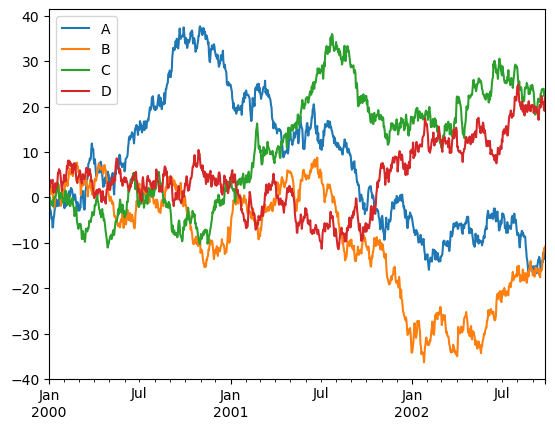

In [76]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
df.plot()

# df.to_csv("aea.csv")

# Pandas Styling

In [77]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4.1234, 5.5678, 6.91011]})

"""
"{:,.2f}" → Thousands separator + 2 decimals (1,234.56)
"{:.1%}" → Percentage (12.3%)
"{:.3e}" → Scientific notation (1.235e+02)
"""

styled_df = df.style.format({'B': "{:,.2f}"})
styled_df

,A,B
0,1,4.12
1,2,5.57
2,3,6.91


In [78]:
df = pd.DataFrame({'Price': [1234.57, 9876.43], 'Discount': [0.15, 0.25]})
style_df = df.style.format({"Price": "{:,.2f}", "Discount": "{:,.2f}%"})
style_df

,Price,Discount
0,"1,234.57",0.15%
1,"9,876.43",0.25%


In [79]:
df = pd.DataFrame({
    'First Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'Weight (kg)': [68, 85, 74, 90, 62],
    'Height (cm)': [165, 180, 175, 185, 160],
    'IQ': [120, 135, 110, 145, 125]
})
style_df = df.style.highlight_max(axis=0, color="lightgreen")
style_df

,First Name,Weight (kg),Height (cm),IQ
0,Alice,68,165,120
1,Bob,85,180,135
2,Charlie,74,175,110
3,David,90,185,145
4,Emma,62,160,125


In [80]:
df = pd.DataFrame({
    'Monday': [8.5, 7.2, 9.0, 6.8, 8.3],
    'Tuesday': [7.4, 8.1, 6.5, 9.2, 7.0],
    'Wednesday': [8.0, 9.3, 7.7, 8.1, 6.9],
    'Thursday': [6.2, 8.4, 9.1, 7.3, 8.5],
    'Friday': [7.3, 6.8, 8.2, 7.6, 9.1]
}, index=['Alice', 'Bob', 'Charlie', 'David', 'Emma'])

style_df = df.style.highlight_max(axis=1, color="orange")
style_df

,Monday,Tuesday,Wednesday,Thursday,Friday
Alice,8.500000,7.400000,8.000000,6.200000,7.300000
Bob,7.200000,8.100000,9.300000,8.400000,6.800000
Charlie,9.000000,6.500000,7.700000,9.100000,8.200000
David,6.800000,9.200000,8.100000,7.300000,7.600000
Emma,8.300000,7.000000,6.900000,8.500000,9.100000


In [81]:
df.style.background_gradient(cmap="Blues")

,Monday,Tuesday,Wednesday,Thursday,Friday
Alice,8.500000,7.400000,8.000000,6.200000,7.300000
Bob,7.200000,8.100000,9.300000,8.400000,6.800000
Charlie,9.000000,6.500000,7.700000,9.100000,8.200000
David,6.800000,9.200000,8.100000,7.300000,7.600000
Emma,8.300000,7.000000,6.900000,8.500000,9.100000


In [82]:
df.style.background_gradient(axis=1, cmap="coolwarm")

,Monday,Tuesday,Wednesday,Thursday,Friday
Alice,8.500000,7.400000,8.000000,6.200000,7.300000
Bob,7.200000,8.100000,9.300000,8.400000,6.800000
Charlie,9.000000,6.500000,7.700000,9.100000,8.200000
David,6.800000,9.200000,8.100000,7.300000,7.600000
Emma,8.300000,7.000000,6.900000,8.500000,9.100000


In [83]:
df.style.bar(color="green", width=90, axis=1)

,Monday,Tuesday,Wednesday,Thursday,Friday
Alice,8.500000,7.400000,8.000000,6.200000,7.300000
Bob,7.200000,8.100000,9.300000,8.400000,6.800000
Charlie,9.000000,6.500000,7.700000,9.100000,8.200000
David,6.800000,9.200000,8.100000,7.300000,7.600000
Emma,8.300000,7.000000,6.900000,8.500000,9.100000


In [84]:
data = {
    'January': [5000, -2000, 3000, -1000, 2600],
    'February': [-1500, 4000, -2500, 500, -1100],
    'March': [3000, -1800, 6200, -700, 1000],
    'April': [-2200, 5000, -1200, 1000, 3500]
}

index = ['Nimbus Corp', 'Quantum Dynamics', 'Aurora Ventures', 
         'Vertex Solutions', 'Orion Enterprises']

df = pd.DataFrame(data, index=index)
df.style.bar(
    color=["red","green"],
    align=0
)

,January,February,March,April
Nimbus Corp,5000,-1500,3000,-2200
Quantum Dynamics,-2000,4000,-1800,5000
Aurora Ventures,3000,-2500,6200,-1200
Vertex Solutions,-1000,500,-700,1000
Orion Enterprises,2600,-1100,1000,3500


In [85]:
df = pd.DataFrame({
    'Product': ['Shirt', 'Pants', 'Jacket', 'Shoes', 'Hat'],
    'Small (€)': [25.90, 40.10, 60.00, 80.00, 15.00],
    'Medium (€)': [30.50, 45.00, 65.00, 85.00, 18.00],
    'Large (€)': [35.80, 50.00, 70.00, 90.00, 20.00]
})

styled_df = df.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'orange'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'th.index', 'props': [('background-color', 'orange'), ('color', 'black'), ('font-weight', 'bold')]}
       ])
styled_df

,Product,Small (€),Medium (€),Large (€)
0,Shirt,25.900000,30.500000,35.800000
1,Pants,40.100000,45.000000,50.000000
2,Jacket,60.000000,65.000000,70.000000
3,Shoes,80.000000,85.000000,90.000000
4,Hat,15.000000,18.000000,20.000000


In [86]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

locations = ['Zürich', 'Frankfurt', 'Hamburg', 'Munich']

np.random.seed(42)
data = np.random.randint(-5000, 20000, size=(12, 4))

df = pd.DataFrame(data, index=months, columns=locations)

def highlight_values(val):
    if val < 0:
        return 'background-color: red; color: white; font-weight: bold'
    else:
        return 'background-color: lightgreen; color: black; font-weight: bold'

styled_df = df.style.map(highlight_values).set_table_styles([
        {'selector': 'th', 
         'props': [('background-color', 'yellow'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'th.index', 
         'props': [('background-color', 'yellow'), ('color', 'black'), ('font-weight', 'bold')]}
    ]).format("{:,.0f}")
styled_df

,Zürich,Frankfurt,Hamburg,Munich
January,"18,654","10,795","-4,140",390
February,"16,575","6,964","6,284","17,118"
March,"1,265","11,850",-574,"16,962"
April,"9,423","6,363","11,023","3,322"
May,"-3,315","-4,231","18,333","-2,567"
June,311,51,"1,420","12,568"
July,"15,939","14,769","1,396","3,666"
August,"13,942","19,233","13,431","-2,253"
September,"-4,811","14,118","-1,995","16,042"
October,"-3,101","19,118","-3,733","12,912"


# Pandas Pivot

In [87]:
data = {
    'Color': ['red', 'green', 'blue', 'red', 'green', 'blue'],
    'Number': ['one', 'two', 'one', 'two', 'one', 'two'],
    'Time': [345, 325, 898, 989, 23, 143],
    'Point': [1, 2, 3, 4, 5, 6]
}

df = pd.DataFrame(data)
df

,Color,Number,Time,Point
0,red,one,345,1
1,green,two,325,2
2,blue,one,898,3
3,red,two,989,4
4,green,one,23,5
5,blue,two,143,6


In [89]:
df.pivot(index="Color", columns="Number")

Time      Point    
Number  one  two   one two
Color                     
blue    898  143     3   6
green    23  325     5   2
red     345  989     1   4

In [92]:
df.pivot(index="Color", columns="Number", values=["Time"])

Time     
Number  one  two
Color           
blue    898  143
green    23  325
red     345  989

# Groupby

In [103]:
nvalues = 30
values = np.random.randint(1, 20, (nvalues,))
fruits = ["bananas", "oranges", "apples", "clementines", "cherries", "pears"]
fruits_index = np.random.choice(fruits, (nvalues,))

s = pd.Series(values, index=fruits_index)
print(s[:10])

pears           1
cherries        1
clementines    15
oranges         2
clementines    16
oranges         8
oranges        13
apples          1
oranges        16
bananas         7
dtype: int64


In [104]:
grouped = s.groupby(s.index)
grouped

In [113]:
for a,b in grouped:
    print(f"===== {a} ====")
    print(b)

===== apples ====
apples     1
apples    14
apples    14
apples     7
apples     4
apples    10
dtype: int64
===== bananas ====
bananas     7
bananas    19
bananas    12
bananas    16
dtype: int64
===== cherries ====
cherries     1
cherries     5
cherries     3
cherries    16
cherries     1
dtype: int64
===== clementines ====
clementines    15
clementines    16
clementines    12
clementines     5
clementines     5
clementines    15
clementines     5
clementines     5
dtype: int64
===== oranges ====
oranges     2
oranges     8
oranges    13
oranges    16
oranges    16
oranges    17
dtype: int64
===== pears ====
pears    1
dtype: int64
